In [4]:
import os
import sys
import json

import pandas as pd
import numpy as np

from dotenv import load_dotenv
from googleapiclient.discovery import build

In [5]:
load_dotenv()

API_KEY = os.environ['YOUTUBE_API_KEY']
youtube = build('youtube', 'v3', developerKey=API_KEY)
# api = Api(api_key=API_KEY) 

In [40]:
request = youtube.channels().list(
        part="snippet,statistics,contentDetails",
#         forUsername="Vsauce",
        id='UCAov2BBv1ZJav0c_yHEciAw',
    )
response = request.execute()
# print(json.dumps(response, indent=2))
# print(response['items'][0]['snippet']['thumbnails']['high']['url'])

In [41]:
upload_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
upload_id

'UUAov2BBv1ZJav0c_yHEciAw'

In [42]:
request = youtube.playlistItems().list(
        part="snippet",
        playlistId=upload_id,
        maxResults=50,
    )
response = request.execute()
response

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'sf9Jxo3SybQfqDvzAMoBzkEj5wM',
 'nextPageToken': 'CDIQAA',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': '5obn7eHugfMHbOSGLPts1fRKUo8',
   'id': 'VVVBb3YyQkJ2MVpKYXYwY195SEVjaUF3LjhpZmpZeGtNaFVn',
   'snippet': {'publishedAt': '2021-01-10T09:59:47Z',
    'channelId': 'UCAov2BBv1ZJav0c_yHEciAw',
    'title': 'BEST OF THE WEEK 11 | SAMAY RAINA',
    'description': 'JOIN MY GRAPHY https://share.graphyapp.co/8K8w \n\nBECOME DIAMOND MEMBER HERE: https://go.chess.com/samay\n\nJOIN MY CLUB: https://www.chess.com/club/samay-raina-official\n\nJoin this channel to get access to perks:\nhttps://www.youtube.com/channel/UCAov2BBv1ZJav0c_yHEciAw/join\n\nFollow me on instagram\nhttps://www.instagram.com/maisamayhoon/\n\nJoin my discord:\nhttps://discord.gg/maisamayhoon',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/8ifjYxkMhUg/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.c

In [43]:
response['items'][0]['snippet']['title']

'BEST OF THE WEEK 11 | SAMAY RAINA'

In [70]:
next_page_token = response.get('nextPageToken', 0)
while next_page_token:
    next_request = youtube.playlistItems().list_next(
        request, response
    )

    next_response = next_request.execute()
    print(json.dumps(next_response, indent=2))
    break

    next_page_token = next_response.get('nextPageToken', 0)
    request, response = next_request, next_response

In [71]:
next_page = response.get('nextPageToken', 0)
next_page

0

In [72]:
request = youtube.videos().list(
        part="statistics, contentDetails",
        id="8ifjYxkMhUg,SP8hdGSN-0k",
        maxResults=1,
    )
response = request.execute()

print(json.dumps(response, indent=2))

{
  "kind": "youtube#videoListResponse",
  "etag": "OSvjznhgUfDxKIXjbU9LKYHyevA",
  "items": [
    {
      "kind": "youtube#video",
      "etag": "sbLH1xNQLTWmyz8oswVP5KuW3Qs",
      "id": "8ifjYxkMhUg",
      "contentDetails": {
        "duration": "PT8M38S",
        "dimension": "2d",
        "definition": "hd",
        "caption": "false",
        "licensedContent": true,
        "contentRating": {},
        "projection": "rectangular"
      },
      "statistics": {
        "viewCount": "203433",
        "likeCount": "22665",
        "dislikeCount": "318",
        "favoriteCount": "0",
        "commentCount": "753"
      }
    },
    {
      "kind": "youtube#video",
      "etag": "pAOvm0o7BxwVzssHYQ-yb5-Dgic",
      "id": "SP8hdGSN-0k",
      "contentDetails": {
        "duration": "PT1H27M46S",
        "dimension": "2d",
        "definition": "hd",
        "caption": "false",
        "licensedContent": false,
        "contentRating": {},
        "projection": "rectangular"
      },


In [44]:
COLUMNS = [
    'vid_id', 'vid_title', 'vid_description', 'thumbnail_url', 'upload_time', 
    'duration', 'views', 'likes', 'dislikes', 'comment_counts',
]

def add_video_data(res):
    data = []
    for items in res['items']:
        video_id = items['snippet']['resourceId']['videoId']
        video_title = items['snippet']['title']
        video_desc = items['snippet']['description']
        upload_time = items['snippet']['publishedAt']
        thumbnail_url = items['snippet']['thumbnails']['high']['url']

        # print(video_title, upload_time, thumbnail_url)
        temp = [video_id, video_title, video_desc, thumbnail_url, upload_time] + [''] * 5
        data.append(temp)
    
    return data


def get_video_stats(res):
    data = []

    for items in res['items']:
        duration = items['contentDetails']['duration']
        views = items['statistics'].get('viewCount', 0)
        likes = items['statistics'].get('likeCount', 0)
        dislikes = items['statistics'].get('dislikeCount', 0)
        comment_count = items['statistics'].get('commentCount', 0)
        
        temp = [duration, views, likes, dislikes, comment_count]
        data.append(temp)

    return data

In [45]:
all_data = []
video_stats = []

request = youtube.playlistItems().list(
    part="snippet",
    playlistId=upload_id,
    maxResults=50,
)
response = request.execute()

data = add_video_data(response)
all_data.extend(data)

next_page_token = response.get('nextPageToken', 0)

while next_page_token:
    next_request = youtube.playlistItems().list_next(request, response)
    next_response = next_request.execute()

    data = add_video_data(next_response)
    all_data.extend(data)

    next_page_token = next_response.get('nextPageToken', 0)
    request, response = next_request, next_response

raw = pd.DataFrame(all_data, columns=COLUMNS)

In [46]:
raw

,vid_id,vid_title,vid_description,thumbnail_url,upload_time,duration,views,likes,dislikes,comment_counts
0,8ifjYxkMhUg,BEST OF THE WEEK 11 | SAMAY RAINA,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/8ifjYxkMhUg/hqdefault.jpg,2021-01-10T09:59:47Z,,,,,
1,SP8hdGSN-0k,Coming Back to Life - Reaching 1500 ft. Sagar ...,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/SP8hdGSN-0k/hqdefault.jpg,2021-01-04T01:11:08Z,,,,,
2,Tvs-zEOgr7c,SAGAR SHAH EXPOSED - VLOG #3,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/Tvs-zEOgr7c/hqdefault.jpg,2020-12-29T03:53:41Z,,,,,
3,Ge3MN6-JuOw,"ACCIDENTALLY GAVE 10,000 RS. SUPERCHAT TO @Gam...",Play at https://conquer2020.net/\n\nPrizes:\nT...,https://i.ytimg.com/vi/Ge3MN6-JuOw/hqdefault.jpg,2020-12-27T10:34:17Z,,,,,
4,R_LOS5_TpL8,ROAST BATTLE ft. Vidit Gujrathi | Sagar Shah |...,This was recorded in Pune. It was Vidit and Sa...,https://i.ytimg.com/vi/R_LOS5_TpL8/hqdefault.jpg,2020-12-26T15:05:31Z,,,,,
...,...,...,...,...,...,...,...,...,...,...
283,TL4S76ozM60,PUBG with Ojas and Balraj,,https://i.ytimg.com/vi/TL4S76ozM60/hqdefault.jpg,2020-03-24T21:00:10Z,,,,,
284,eLLBm5Ni708,Coming soon,,https://i.ytimg.com/vi/eLLBm5Ni708/hqdefault.jpg,2020-03-24T04:12:14Z,,,,,
285,lwuZ_gEX3mk,Later night chess with friends - Sumit Sourav,,https://i.ytimg.com/vi/lwuZ_gEX3mk/hqdefault.jpg,2020-03-23T22:36:59Z,,,,,
286,6JX7VfiYEMc,PUBG with Ojas,,https://i.ytimg.com/vi/6JX7VfiYEMc/hqdefault.jpg,2020-03-23T19:25:48Z,,,,,


In [47]:
video_stats = []
total_videos = raw.shape[0]
print(total_videos)

for i in range(0, total_videos, 50):
    request = youtube.videos().list(
            part="statistics, contentDetails",
            id=','.join(raw['vid_id'].values[i:i+50]),
        )
    
    response = request.execute()

#     print(json.dumps(response, indent=2))
    try:
        data = get_video_stats(response)
    except Exception as e:
        print(e)
        print(json.dumps(response, indent=2))
# print(data)
    video_stats.extend(data)

print(len(video_stats))

288
288


In [48]:
raw.iloc[:, 5:] = video_stats

In [49]:
raw

,vid_id,vid_title,vid_description,thumbnail_url,upload_time,duration,views,likes,dislikes,comment_counts
0,8ifjYxkMhUg,BEST OF THE WEEK 11 | SAMAY RAINA,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/8ifjYxkMhUg/hqdefault.jpg,2021-01-10T09:59:47Z,PT8M38S,206794,22811,339,761
1,SP8hdGSN-0k,Coming Back to Life - Reaching 1500 ft. Sagar ...,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/SP8hdGSN-0k/hqdefault.jpg,2021-01-04T01:11:08Z,PT1H27M46S,183488,13163,241,433
2,Tvs-zEOgr7c,SAGAR SHAH EXPOSED - VLOG #3,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/Tvs-zEOgr7c/hqdefault.jpg,2020-12-29T03:53:41Z,PT14M27S,371705,39035,287,1064
3,Ge3MN6-JuOw,"ACCIDENTALLY GAVE 10,000 RS. SUPERCHAT TO @Gam...",Play at https://conquer2020.net/\n\nPrizes:\nT...,https://i.ytimg.com/vi/Ge3MN6-JuOw/hqdefault.jpg,2020-12-27T10:34:17Z,PT6M25S,211581,26742,347,527
4,R_LOS5_TpL8,ROAST BATTLE ft. Vidit Gujrathi | Sagar Shah |...,This was recorded in Pune. It was Vidit and Sa...,https://i.ytimg.com/vi/R_LOS5_TpL8/hqdefault.jpg,2020-12-26T15:05:31Z,PT12M13S,494770,50353,516,2108
...,...,...,...,...,...,...,...,...,...,...
283,TL4S76ozM60,PUBG with Ojas and Balraj,,https://i.ytimg.com/vi/TL4S76ozM60/hqdefault.jpg,2020-03-24T21:00:10Z,PT1H18M30S,20762,1282,24,40
284,eLLBm5Ni708,Coming soon,,https://i.ytimg.com/vi/eLLBm5Ni708/hqdefault.jpg,2020-03-24T04:12:14Z,PT1M37S,374783,30889,630,1137
285,lwuZ_gEX3mk,Later night chess with friends - Sumit Sourav,,https://i.ytimg.com/vi/lwuZ_gEX3mk/hqdefault.jpg,2020-03-23T22:36:59Z,PT1H35M11S,24606,1208,20,48
286,6JX7VfiYEMc,PUBG with Ojas,,https://i.ytimg.com/vi/6JX7VfiYEMc/hqdefault.jpg,2020-03-23T19:25:48Z,PT1H29M34S,28410,1768,25,63


In [50]:
df = raw.copy()

In [51]:
INT_COLS = ['views', 'likes', 'dislikes', 'comment_counts'] 

df[INT_COLS] = df[INT_COLS].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   vid_id           288 non-null    object
 1   vid_title        288 non-null    object
 2   vid_description  288 non-null    object
 3   thumbnail_url    288 non-null    object
 4   upload_time      288 non-null    object
 5   duration         288 non-null    object
 6   views            288 non-null    int64 
 7   likes            288 non-null    int64 
 8   dislikes         288 non-null    int64 
 9   comment_counts   288 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 22.6+ KB


In [53]:
import datetime

datetime.datetime.strptime('2019-06-26T09:29:17Z', "%Y-%m-%dT%H:%M:%S%z")

datetime.datetime(2019, 6, 26, 9, 29, 17, tzinfo=datetime.timezone.utc)

In [54]:
df['upload_date'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").day
)
df['upload_month'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").month
)
df['upload_year'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").year
)
df['upload_hour'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").hour
)
df['upload_minute'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").minute
)
df['upload_second'] = df['upload_time'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").second
)

In [55]:
dur = 'PT1H58M45S'

def convert_dur(s):
    mapp = { 'H': '*60', 'M': '*1', 'S': '/60' }
    time, val, units, prev_char = 0, [], [], True
    for char in s[2:]:
        if char.isdigit():
            if prev_char:
                val.append(char)
            else:
                val[-1] += char
            prev_char = False
        else:
            units.append(char)
            prev_char = True
           
    for u, v in zip(units, val):
        time += eval(v+mapp[u])
        
    return time

In [56]:
convert_dur(dur)

118.75

In [57]:
df['vid_dur'] = df['duration'].apply(lambda x: convert_dur(x))

In [58]:
CATEGORY_COLS = ['upload_year', 'upload_month', 'upload_date', 'upload_hour', 'upload_minute', 'upload_second'] 

df[CATEGORY_COLS] = df[CATEGORY_COLS].astype('category')

In [59]:
df['likes_percent'] = df['likes']  * 100 / (df['likes'] + df['dislikes'])
df['dislikes_percent'] = df['dislikes'] * 100 / (df['likes'] + df['dislikes'])

df['likes_percent'].fillna(0, inplace=True)
df['dislikes_percent'].fillna(0, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   vid_id            288 non-null    object  
 1   vid_title         288 non-null    object  
 2   vid_description   288 non-null    object  
 3   thumbnail_url     288 non-null    object  
 4   upload_time       288 non-null    object  
 5   duration          288 non-null    object  
 6   views             288 non-null    int64   
 7   likes             288 non-null    int64   
 8   dislikes          288 non-null    int64   
 9   comment_counts    288 non-null    int64   
 10  upload_date       288 non-null    category
 11  upload_month      288 non-null    category
 12  upload_year       288 non-null    category
 13  upload_hour       288 non-null    category
 14  upload_minute     288 non-null    category
 15  upload_second     288 non-null    category
 16  vid_dur           288 non-

In [61]:
import plotly.express as px

LABELS = { 
    'upload_year': 'Year', 
    'views': 'Total Views', 
    'vid_dur': 'Video Length (mins)',
    'vid_title': 'Video Title',
    'dislikes_percent': 'Dislike Percentage',
    'likes_percent': 'Like Percentage',
    'vid_id': 'Total Videos',
}

# views vs video length (like percent)

fig = px.scatter(
    data_frame=df,
    x='vid_dur',
    y='views',
    color='upload_year',
    size='likes_percent',
    opacity=0.4,
    hover_data=['vid_title'],
    labels=LABELS,
    
)
fig.add_hline(y=df['views'].median(), line_dash='dash', )

fig.show()

In [62]:
# views vs video length (dislike percent)

fig = px.scatter(
    data_frame=df,
    x='vid_dur',
    y='views',
    color='upload_year',
    size='dislikes_percent',
    opacity=0.6,
    hover_data=['vid_title'],
    labels=LABELS,
    
)
fig.add_hline(y=df['views'].median(), line_dash='dash', )

fig.show()

In [71]:
df

,vid_id,vid_title,vid_description,thumbnail_url,upload_time,duration,views,likes,dislikes,comment_counts,upload_date,upload_month,upload_year,upload_hour,upload_minute,upload_second,vid_dur,likes_percent,dislikes_percent,clean_title
0,8ifjYxkMhUg,BEST OF THE WEEK 11 | SAMAY RAINA,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/8ifjYxkMhUg/hqdefault.jpg,2021-01-10T09:59:47Z,PT8M38S,206794,22811,339,761,10,1,2021,9,59,47,8.633333,98.535637,1.464363,best week samay raina
1,SP8hdGSN-0k,Coming Back to Life - Reaching 1500 ft. Sagar ...,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/SP8hdGSN-0k/hqdefault.jpg,2021-01-04T01:11:08Z,PT1H27M46S,183488,13163,241,433,4,1,2021,1,11,8,87.766667,98.202029,1.797971,coming back life reaching ft sagar exposed shah
2,Tvs-zEOgr7c,SAGAR SHAH EXPOSED - VLOG #3,JOIN MY GRAPHY https://share.graphyapp.co/8K8w...,https://i.ytimg.com/vi/Tvs-zEOgr7c/hqdefault.jpg,2020-12-29T03:53:41Z,PT14M27S,371705,39035,287,1064,29,12,2020,3,53,41,14.450000,99.270129,0.729871,sagar shah exposed vlog
3,Ge3MN6-JuOw,"ACCIDENTALLY GAVE 10,000 RS. SUPERCHAT TO @Gam...",Play at https://conquer2020.net/\n\nPrizes:\nT...,https://i.ytimg.com/vi/Ge3MN6-JuOw/hqdefault.jpg,2020-12-27T10:34:17Z,PT6M25S,211581,26742,347,527,27,12,2020,10,34,17,6.416667,98.719037,1.280963,accidentally gave rs superchat gamerfleet budw...
4,R_LOS5_TpL8,ROAST BATTLE ft. Vidit Gujrathi | Sagar Shah |...,This was recorded in Pune. It was Vidit and Sa...,https://i.ytimg.com/vi/R_LOS5_TpL8/hqdefault.jpg,2020-12-26T15:05:31Z,PT12M13S,494770,50353,516,2108,26,12,2020,15,5,31,12.216667,98.985630,1.014370,roast battle ft vidit gujrathi sagar shah sama...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,TL4S76ozM60,PUBG with Ojas and Balraj,,https://i.ytimg.com/vi/TL4S76ozM60/hqdefault.jpg,2020-03-24T21:00:10Z,PT1H18M30S,20762,1282,24,40,24,3,2020,21,0,10,78.500000,98.162328,1.837672,pubg ojas balraj
284,eLLBm5Ni708,Coming soon,,https://i.ytimg.com/vi/eLLBm5Ni708/hqdefault.jpg,2020-03-24T04:12:14Z,PT1M37S,374783,30889,630,1137,24,3,2020,4,12,14,1.616667,98.001206,1.998794,coming soon
285,lwuZ_gEX3mk,Later night chess with friends - Sumit Sourav,,https://i.ytimg.com/vi/lwuZ_gEX3mk/hqdefault.jpg,2020-03-23T22:36:59Z,PT1H35M11S,24606,1208,20,48,23,3,2020,22,36,59,95.183333,98.371336,1.628664,later night chess friends sumit sourav
286,6JX7VfiYEMc,PUBG with Ojas,,https://i.ytimg.com/vi/6JX7VfiYEMc/hqdefault.jpg,2020-03-23T19:25:48Z,PT1H29M34S,28410,1768,25,63,23,3,2020,19,25,48,89.566667,98.605689,1.394311,pubg ojas


In [63]:
yearwise = df.groupby('upload_year').count()['vid_id']

In [64]:
fig = px.line(
    data_frame=yearwise,
    y='vid_id',
    labels=LABELS
)

fig.update_layout(
    xaxis = dict(
        dtick = 1
    )
)

fig.show()

In [65]:
import texthero as hero

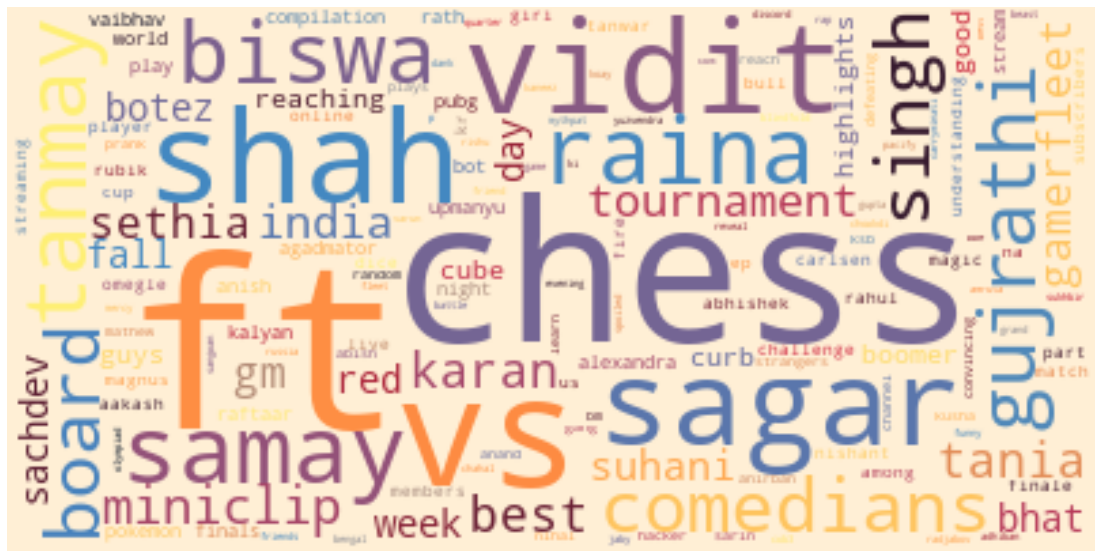

In [70]:
clean_title = df['vid_title'].pipe(hero.clean)

fig = hero.visualization.wordcloud(clean_title)
fig

In [72]:
df.groupby('upload_month').count()

,vid_id,vid_title,vid_description,thumbnail_url,upload_time,duration,views,likes,dislikes,comment_counts,upload_date,upload_year,upload_hour,upload_minute,upload_second,vid_dur,likes_percent,dislikes_percent,clean_title
upload_month,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
5,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
6,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
7,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
8,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
9,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
10,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
